In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [27]:
data_failure_depth = np.load('Targets/4ft_failure_depths.npy')
data_velocity_plot = np.load('Targets/4ft_velocity_plots.npy')

In [28]:
n_sim = len(data_failure_depth[0,:])
n_x = 33
n_y =25

In [29]:
velo = np.zeros((n_y,n_x,n_sim))
fail_depth = np.zeros((1,n_sim))
for j in range(n_sim):
    velo[:,:,j] = (data_velocity_plot[:,:,j] - np.min(data_velocity_plot[:,:,j]))/(np.max(data_velocity_plot[:,:,j])-np.min(data_velocity_plot[:,:,j]))
    fail_depth[:,j] = (data_failure_depth[:,j]-np.min(data_failure_depth))/(np.max(data_failure_depth)-np.min(data_failure_depth))

In [30]:
y_dataset = np.reshape(fail_depth,(n_sim))

In [31]:
fail_depth

array([[0.36363636, 0.31818182, 0.36363636, ..., 0.31818182, 0.40909091,
        0.31818182]])

In [32]:
np.shape(velo)

(25, 33, 131072)

In [33]:
x_d = velo
x_d = np.reshape(x_d,(n_sim,n_y,n_x,1))

In [34]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_d,y_dataset, test_size=0.2, random_state = 42)

In [45]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size = 4, activation='relu', input_shape=[n_y, n_x,1], name ="conv1"),
    keras.layers.MaxPool2D(pool_size=2, strides=2, name ="pool1"),
    keras.layers.Conv2D(filters=64, kernel_size=4, activation='relu', name ="conv2"),
    keras.layers.MaxPool2D(pool_size=2, strides=2, name ="pool2"),
    keras.layers.Flatten(name="flat"),
    keras.layers.Dense(units=256, activation = tf.keras.layers.LeakyReLU(alpha=0.01), name="fc1"),
    keras.layers.Dense(units=128, activation = tf.keras.layers.LeakyReLU(alpha=0.01), name="fc2"),
    keras.layers.Dense(units=64, activation = tf.keras.layers.LeakyReLU(alpha=0.01), name="fc3"),
    keras.layers.Dense(units=32, activation = tf.keras.layers.LeakyReLU(alpha=0.01), name="fc4"),
    keras.layers.Dense(units=16, activation = tf.keras.layers.LeakyReLU(alpha=0.01), name="fc5"),
    #keras.layers.Dense(units=256, activation='relu', name="fc4"),
    #keras.layers.Dense(units=128, activation='relu', name="fc5"),
    #keras.layers.Dense(units=64, activation='relu', name="fc6"),
    #keras.layers.Dense(units=32, activation='relu', name="fc7"),
    keras.layers.Dense(units = 1, activation='linear', name="fc6")    
])

In [46]:
cnn.compile(optimizer = 'adam', loss = 'mean_squared_error',  metrics = 'accuracy')

In [47]:
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 22, 30, 64)        1088      
                                                                 
 pool1 (MaxPooling2D)        (None, 11, 15, 64)        0         
                                                                 
 conv2 (Conv2D)              (None, 8, 12, 64)         65600     
                                                                 
 pool2 (MaxPooling2D)        (None, 4, 6, 64)          0         
                                                                 
 flat (Flatten)              (None, 1536)              0         
                                                                 
 fc1 (Dense)                 (None, 256)               393472    
                                                                 
 fc2 (Dense)                 (None, 128)              

In [49]:
cnn.fit(x_train ,y_train, batch_size = 32, epochs = 1000)

Epoch 1/1000
3277/3277 [==============================] - 74s 23ms/step - loss: 0.0509 - accuracy: 0.0168
Epoch 2/1000
3277/3277 [==============================] - 74s 22ms/step - loss: 0.0501 - accuracy: 0.0182
Epoch 3/1000
3277/3277 [==============================] - 74s 23ms/step - loss: 0.0490 - accuracy: 0.0210
Epoch 4/1000
3277/3277 [==============================] - 74s 23ms/step - loss: 0.0474 - accuracy: 0.0250
Epoch 5/1000
3277/3277 [==============================] - 74s 23ms/step - loss: 0.0457 - accuracy: 0.0286
Epoch 6/1000
3277/3277 [==============================] - 73s 22ms/step - loss: 0.0437 - accuracy: 0.0323
Epoch 7/1000
3277/3277 [==============================] - 73s 22ms/step - loss: 0.0414 - accuracy: 0.0360
Epoch 8/1000
3277/3277 [==============================] - 73s 22ms/step - loss: 0.0392 - accuracy: 0.0396
Epoch 9/1000
3277/3277 [==============================] - 73s 22ms/step - loss: 0.0371 - accuracy: 0.0428
Epoch 10/1000
3277/3277 [=====================

3277/3277 [==============================] - 76s 23ms/step - loss: 0.0562 - accuracy: 0.0649
Epoch 78/1000
3277/3277 [==============================] - 76s 23ms/step - loss: 0.0086 - accuracy: 0.0650
Epoch 79/1000
3277/3277 [==============================] - 76s 23ms/step - loss: 0.0074 - accuracy: 0.0653
Epoch 80/1000
3277/3277 [==============================] - 76s 23ms/step - loss: 0.0159 - accuracy: 0.0655
Epoch 81/1000
3277/3277 [==============================] - 76s 23ms/step - loss: 0.0055 - accuracy: 0.0658
Epoch 82/1000
3277/3277 [==============================] - 76s 23ms/step - loss: 0.0050 - accuracy: 0.0662
Epoch 83/1000
3277/3277 [==============================] - 76s 23ms/step - loss: 0.0048 - accuracy: 0.0663
Epoch 84/1000
3277/3277 [==============================] - 76s 23ms/step - loss: 0.0053 - accuracy: 0.0662
Epoch 85/1000
3277/3277 [==============================] - 76s 23ms/step - loss: 0.0076 - accuracy: 0.0656
Epoch 86/1000
3277/3277 [==========================

3277/3277 [==============================] - 81s 25ms/step - loss: 0.0044 - accuracy: 0.0664
Epoch 154/1000
3277/3277 [==============================] - 81s 25ms/step - loss: 0.0040 - accuracy: 0.0664
Epoch 155/1000
3277/3277 [==============================] - 81s 25ms/step - loss: 0.0159 - accuracy: 0.0650
Epoch 156/1000
3277/3277 [==============================] - 81s 25ms/step - loss: 0.0060 - accuracy: 0.0662
Epoch 157/1000
3277/3277 [==============================] - 81s 25ms/step - loss: 0.0043 - accuracy: 0.0664
Epoch 158/1000
3277/3277 [==============================] - 81s 25ms/step - loss: 0.0039 - accuracy: 0.0664
Epoch 159/1000
3277/3277 [==============================] - 82s 25ms/step - loss: 0.0076 - accuracy: 0.0663
Epoch 160/1000
3277/3277 [==============================] - 82s 25ms/step - loss: 0.0043 - accuracy: 0.0662
Epoch 161/1000
3277/3277 [==============================] - 83s 25ms/step - loss: 0.0038 - accuracy: 0.0663
Epoch 162/1000
3277/3277 [=================

3277/3277 [==============================] - 82s 25ms/step - loss: 0.0331 - accuracy: 0.0493
Epoch 229/1000
3277/3277 [==============================] - 82s 25ms/step - loss: 0.0292 - accuracy: 0.0530
Epoch 230/1000
3277/3277 [==============================] - 82s 25ms/step - loss: 0.0264 - accuracy: 0.0556
Epoch 231/1000
3277/3277 [==============================] - 82s 25ms/step - loss: 0.0241 - accuracy: 0.0579
Epoch 232/1000
3277/3277 [==============================] - 82s 25ms/step - loss: 0.0215 - accuracy: 0.0601
Epoch 233/1000
3277/3277 [==============================] - 82s 25ms/step - loss: 0.0189 - accuracy: 0.0618
Epoch 234/1000
3277/3277 [==============================] - 82s 25ms/step - loss: 0.0220 - accuracy: 0.0597
Epoch 235/1000
3277/3277 [==============================] - 82s 25ms/step - loss: 1.9118 - accuracy: 0.0369
Epoch 236/1000
3277/3277 [==============================] - 82s 25ms/step - loss: 0.0418 - accuracy: 0.0367
Epoch 237/1000
3277/3277 [=================

Epoch 304/1000
3277/3277 [==============================] - 84s 26ms/step - loss: 0.0097 - accuracy: 0.0654
Epoch 305/1000
3277/3277 [==============================] - 84s 26ms/step - loss: 0.0172 - accuracy: 0.0582
Epoch 306/1000
3277/3277 [==============================] - 84s 26ms/step - loss: 0.0212 - accuracy: 0.0563
Epoch 307/1000
3277/3277 [==============================] - 84s 26ms/step - loss: 0.0169 - accuracy: 0.0629
Epoch 308/1000
3277/3277 [==============================] - 84s 26ms/step - loss: 0.0128 - accuracy: 0.0646
Epoch 309/1000
3277/3277 [==============================] - 84s 26ms/step - loss: 0.0091 - accuracy: 0.0655
Epoch 310/1000
3277/3277 [==============================] - 84s 26ms/step - loss: 0.0159 - accuracy: 0.0629
Epoch 311/1000
3277/3277 [==============================] - 84s 26ms/step - loss: 3.8209 - accuracy: 0.0520
Epoch 312/1000
3277/3277 [==============================] - 84s 26ms/step - loss: 0.0394 - accuracy: 0.0355
Epoch 313/1000
3277/3277 [==

3277/3277 [==============================] - 87s 26ms/step - loss: 0.0317 - accuracy: 0.0497
Epoch 380/1000
3277/3277 [==============================] - 87s 27ms/step - loss: 0.0252 - accuracy: 0.0587
Epoch 381/1000
3277/3277 [==============================] - 87s 27ms/step - loss: 0.0164 - accuracy: 0.0644
Epoch 382/1000
3277/3277 [==============================] - 87s 26ms/step - loss: 0.0180 - accuracy: 0.0614
Epoch 383/1000
3277/3277 [==============================] - 87s 26ms/step - loss: 0.0433 - accuracy: 0.0346
Epoch 384/1000
3277/3277 [==============================] - 87s 27ms/step - loss: 0.0359 - accuracy: 0.0458
Epoch 385/1000
3277/3277 [==============================] - 87s 27ms/step - loss: 0.0193 - accuracy: 0.0633
Epoch 386/1000
3277/3277 [==============================] - 87s 27ms/step - loss: 0.0131 - accuracy: 0.0650
Epoch 387/1000
3277/3277 [==============================] - 87s 27ms/step - loss: 0.0122 - accuracy: 0.0645
Epoch 388/1000
3277/3277 [=================

3277/3277 [==============================] - 99s 30ms/step - loss: 0.0507 - accuracy: 0.0208
Epoch 455/1000
3277/3277 [==============================] - 100s 30ms/step - loss: 0.0506 - accuracy: 0.0173
Epoch 456/1000
3277/3277 [==============================] - 100s 30ms/step - loss: 0.0506 - accuracy: 0.0190
Epoch 457/1000
3277/3277 [==============================] - 99s 30ms/step - loss: 0.0507 - accuracy: 0.0173
Epoch 458/1000
3277/3277 [==============================] - 99s 30ms/step - loss: 0.0505 - accuracy: 0.0197
Epoch 459/1000
3277/3277 [==============================] - 99s 30ms/step - loss: 0.0587 - accuracy: 0.0169
Epoch 460/1000
3277/3277 [==============================] - 100s 30ms/step - loss: 0.0474 - accuracy: 0.0245
Epoch 461/1000
3277/3277 [==============================] - 102s 31ms/step - loss: 0.0508 - accuracy: 0.0255
Epoch 462/1000
3277/3277 [==============================] - 98s 30ms/step - loss: 0.0476 - accuracy: 0.0225
Epoch 463/1000
3277/3277 [=============

3277/3277 [==============================] - 111s 34ms/step - loss: 0.0523 - accuracy: 0.0156
Epoch 530/1000
3277/3277 [==============================] - 116s 35ms/step - loss: 0.0534 - accuracy: 0.0156
Epoch 531/1000
3277/3277 [==============================] - 116s 35ms/step - loss: 0.0534 - accuracy: 0.0156
Epoch 532/1000
3277/3277 [==============================] - 116s 35ms/step - loss: 0.0532 - accuracy: 0.0156
Epoch 533/1000
3277/3277 [==============================] - 117s 36ms/step - loss: 0.0527 - accuracy: 0.0156
Epoch 534/1000
3277/3277 [==============================] - 117s 36ms/step - loss: 0.0520 - accuracy: 0.0156
Epoch 535/1000
3277/3277 [==============================] - 118s 36ms/step - loss: 0.0528 - accuracy: 0.0156
Epoch 536/1000
3277/3277 [==============================] - 117s 36ms/step - loss: 0.0521 - accuracy: 0.0156
Epoch 537/1000
3277/3277 [==============================] - 117s 36ms/step - loss: 0.0520 - accuracy: 0.0156
Epoch 538/1000
3277/3277 [========

3277/3277 [==============================] - 130s 40ms/step - loss: 0.0521 - accuracy: 0.0156
Epoch 605/1000
3277/3277 [==============================] - 129s 39ms/step - loss: 0.0519 - accuracy: 0.0156
Epoch 606/1000
3277/3277 [==============================] - 129s 40ms/step - loss: 0.0525 - accuracy: 0.0157
Epoch 607/1000
3277/3277 [==============================] - 130s 40ms/step - loss: 0.0518 - accuracy: 0.0156
Epoch 608/1000
3277/3277 [==============================] - 129s 39ms/step - loss: 0.0518 - accuracy: 0.0156
Epoch 609/1000
3277/3277 [==============================] - 129s 39ms/step - loss: 0.0528 - accuracy: 0.0156
Epoch 610/1000
3277/3277 [==============================] - 129s 39ms/step - loss: 0.0518 - accuracy: 0.0156
Epoch 611/1000
3277/3277 [==============================] - 130s 40ms/step - loss: 0.0520 - accuracy: 0.0156
Epoch 612/1000
3277/3277 [==============================] - 130s 40ms/step - loss: 0.0518 - accuracy: 0.0156
Epoch 613/1000
3277/3277 [========

3277/3277 [==============================] - 157s 48ms/step - loss: 0.0518 - accuracy: 0.0156
Epoch 680/1000
3277/3277 [==============================] - 159s 49ms/step - loss: 41.6419 - accuracy: 0.0156
Epoch 681/1000
3277/3277 [==============================] - 157s 48ms/step - loss: 0.0518 - accuracy: 0.0156
Epoch 682/1000
3277/3277 [==============================] - 156s 48ms/step - loss: 0.0518 - accuracy: 0.0156
Epoch 683/1000
3277/3277 [==============================] - 154s 47ms/step - loss: 0.0518 - accuracy: 0.0156
Epoch 684/1000
3277/3277 [==============================] - 157s 48ms/step - loss: 0.0518 - accuracy: 0.0156
Epoch 685/1000
3277/3277 [==============================] - 154s 47ms/step - loss: 0.0518 - accuracy: 0.0156
Epoch 686/1000
3277/3277 [==============================] - 159s 48ms/step - loss: 0.0518 - accuracy: 0.0156
Epoch 687/1000
3277/3277 [==============================] - 159s 49ms/step - loss: 0.0519 - accuracy: 0.0156
Epoch 688/1000
3277/3277 [=======

3277/3277 [==============================] - 177s 54ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 755/1000
3277/3277 [==============================] - 177s 54ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 756/1000
3277/3277 [==============================] - 177s 54ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 757/1000
3277/3277 [==============================] - 176s 54ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 758/1000
3277/3277 [==============================] - 179s 55ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 759/1000
3277/3277 [==============================] - 176s 54ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 760/1000
3277/3277 [==============================] - 177s 54ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 761/1000
3277/3277 [==============================] - 179s 55ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 762/1000
3277/3277 [==============================] - 180s 55ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 763/1000
3277/3277 [========

3277/3277 [==============================] - 201s 61ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 830/1000
3277/3277 [==============================] - 202s 62ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 831/1000
3277/3277 [==============================] - 201s 61ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 832/1000
3277/3277 [==============================] - 200s 61ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 833/1000
3277/3277 [==============================] - 202s 62ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 834/1000
3277/3277 [==============================] - 202s 62ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 835/1000
3277/3277 [==============================] - 206s 63ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 836/1000
3277/3277 [==============================] - 207s 63ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 837/1000
3277/3277 [==============================] - 208s 63ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 838/1000
3277/3277 [========

3277/3277 [==============================] - 238s 73ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 905/1000
3277/3277 [==============================] - 241s 74ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 906/1000
3277/3277 [==============================] - 241s 74ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 907/1000
3277/3277 [==============================] - 243s 74ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 908/1000
3277/3277 [==============================] - 244s 74ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 909/1000
3277/3277 [==============================] - 243s 74ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 910/1000
3277/3277 [==============================] - 245s 75ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 911/1000
3277/3277 [==============================] - 243s 74ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 912/1000
3277/3277 [==============================] - 243s 74ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 913/1000
3277/3277 [========

3277/3277 [==============================] - 259s 79ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 980/1000
3277/3277 [==============================] - 258s 79ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 981/1000
3277/3277 [==============================] - 260s 79ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 982/1000
3277/3277 [==============================] - 258s 79ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 983/1000
3277/3277 [==============================] - 259s 79ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 984/1000
3277/3277 [==============================] - 259s 79ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 985/1000
3277/3277 [==============================] - 260s 79ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 986/1000
3277/3277 [==============================] - 264s 80ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 987/1000
3277/3277 [==============================] - 266s 81ms/step - loss: 0.0517 - accuracy: 0.0156
Epoch 988/1000
3277/3277 [========

In [ ]:
prediction = cnn.predict(x_test)

In [ ]:
#cnn.get_weights()

In [ ]:
pred_new = np.zeros((len(y_test)))
for i in range(len(y_test)):
    pred_new[i] = (prediction[i]*((np.max(prediction)-np.min(prediction)))) + np.min(prediction)

In [ ]:
test_new = np.zeros((len(y_test)))
for i in range(len(y_test)):
    test_new[i] = (y_test[i]*((np.max(y_test)-np.min(y_test)))) + np.min(y_test)

In [ ]:
df1 = pd.DataFrame({'CNN_predicted': pred_new, 'simulation': test_new})

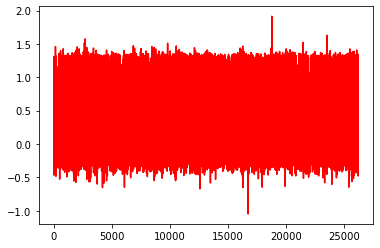

In [56]:
x = np.linspace(1,len(x_test),len(x_test))
y = test_new
y2 = pred_new
fig, ax = plt.subplots()
ax.plot(x, y, color = 'blue')
ax.plot(x, y2, color = 'red')
plt.show()

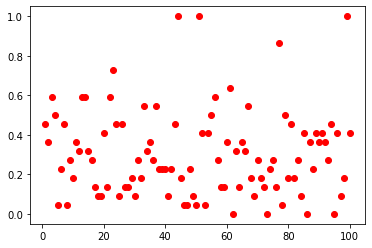

In [64]:
plt.scatter(x[0:100],y[0:100], color = 'red')

In [58]:
x

array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 2.6213e+04, 2.6214e+04,
       2.6215e+04])

In [51]:
df1

,CNN_predicted,simulation
0,0.277028,0.454545
1,0.245838,0.363636
2,0.507705,0.590909
3,0.634841,0.500000
4,-0.142346,0.045455
...,...,...
26210,-0.479262,0.272727
26211,-0.117981,0.090909
26212,0.174025,0.363636
26213,0.671500,0.363636


In [53]:
from sklearn.metrics import r2_score

In [54]:
r2score =  r2_score(df1['simulation'],df1['CNN_predicted'])

In [65]:
#r2score

In [ ]:
plot.scatter(xTrain, yTrain, color = 'red')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')plot.title('Salary vs Experience (Training set)')plot.xlabel('Years of Experience')plot.ylabel('Salary')plot.show()